In [46]:
#Import libraries
import numpy as np
import matplotlib.pyplot as plt
from astropy.modeling.models import BlackBody
from astropy import units as u
from astropy.constants import sigma_sb
from astropy.constants import L_sun
from astropy.constants import c

In [2]:
#Load B and V filter transmission curves
%cd C:\Users\titan\OneDrive\Desktop\McMaster\Intro Astro\A1
B_data = np.loadtxt("Generic_Bessell.B.dat", delimiter=" ", skiprows=0)  # skip header row if needed
V_data = np.loadtxt("Generic_Bessell.V.dat", delimiter=" ", skiprows=0)

wavelength_B = B_data[:,0] * u.AA
trans_B = B_data[:,1]

wavelength_V = V_data[:,0] * u.AA
trans_V = V_data[:,1]

C:\Users\titan\OneDrive\Desktop\McMaster\Intro Astro\A1


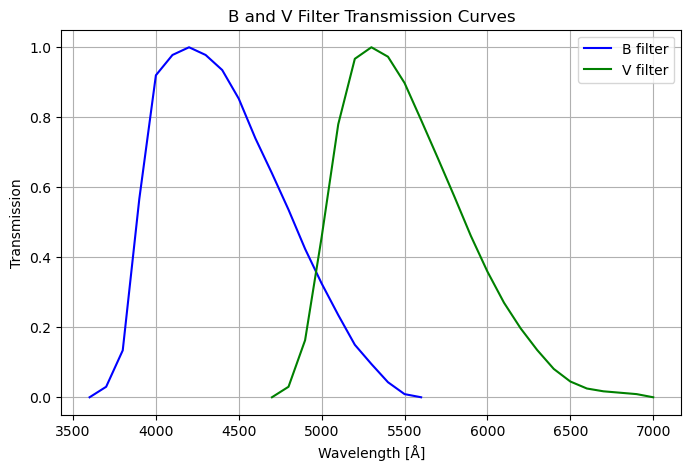

In [3]:
# Plot transmission curves
plt.figure(figsize=(8,5))
plt.plot(wavelength_B, trans_B, label='B filter', color='blue')
plt.plot(wavelength_V, trans_V, label='V filter', color='green')
plt.xlabel("Wavelength [Å]")
plt.ylabel("Transmission")
plt.title("B and V Filter Transmission Curves")
plt.legend()
plt.grid(True)
plt.show()

In [4]:
#Stellar temperatures
temperatures = np.array([4000,5770,20000,]) * u.K  # Example temperatures

In [38]:
bb = BlackBody(temperatures[1])
flux_across_B = np.array(bb(wavelength_B)) * bb(wavelength_B).unit
flux_across_V = np.array(bb(wavelength_V)) * bb(wavelength_V).unit

In [39]:
#compute combination of filter and flux
result_flux_B = flux_across_B * trans_B
result_flux_V = flux_across_V * trans_V

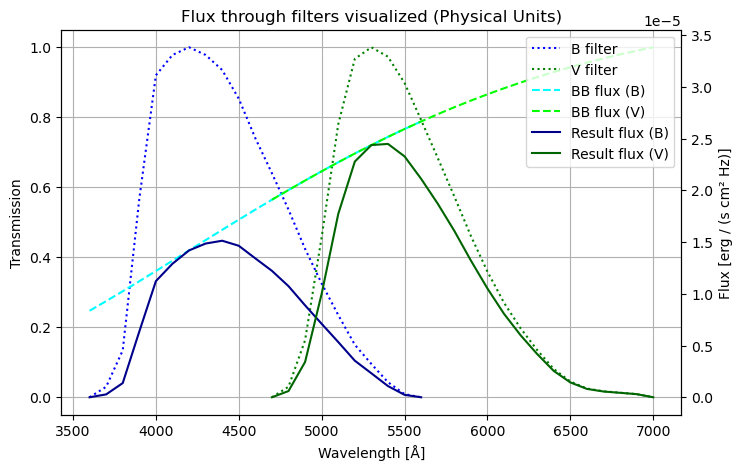

In [41]:
# Create figure and left axis for transmission
fig, ax1 = plt.subplots(figsize=(8,5))
ax1.plot(wavelength_B, trans_B,':', label='B filter', color='blue')
ax1.plot(wavelength_V, trans_V, ':', label='V filter', color='green')
ax1.set_xlabel("Wavelength [Å]")
ax1.set_ylabel("Transmission")
ax1.grid(True)

# Right axis for flux (physical units)
ax2 = ax1.twinx()
ax2.plot(wavelength_B, flux_across_B, '--', label='BB flux (B)', color='cyan')
ax2.plot(wavelength_V, flux_across_V, '--', label='BB flux (V)', color='lime')
ax2.plot(wavelength_B, result_flux_B, label='Result flux (B)', color='darkblue')
ax2.plot(wavelength_V, result_flux_V, label='Result flux (V)', color='darkgreen')
ax2.set_ylabel("Flux [erg / (s cm² Hz)]")  # Actual flux units

# Combine legends
lines1, labels1 = ax1.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
ax2.legend(lines1 + lines2, labels1 + labels2, loc='upper right')

plt.title("Flux through filters visualized (Physical Units)")
plt.show()

In [42]:
flux_across_B

<Quantity [8.36519255e-06, 9.29324652e-06, 1.02457565e-05, 1.12172420e-05,
           1.22023891e-05, 1.31961133e-05, 1.41936085e-05, 1.51903812e-05,
           1.61822742e-05, 1.71654803e-05, 1.81365470e-05, 1.90923749e-05,
           2.00302107e-05, 2.09476355e-05, 2.18425503e-05, 2.27131587e-05,
           2.35579486e-05, 2.43756723e-05, 2.51653269e-05, 2.59261339e-05,
           2.66575199e-05] erg / (Hz s sr cm2)>

In [45]:
print(result_flux_B.unit)

erg / (Hz s sr cm2)


In [72]:
def integrated_colour_flux(temperature,wavelengths,transmission):
    bb = BlackBody(temperature)
    frequencies = (c / wavelengths).to(u.Hz)
    flux_across_band = np.array(bb(frequencies)) * bb(frequencies).unit
    result_flux = flux_across_band * transmission
    integrated_flux = np.trapezoid(result_flux,frequencies)
    #integrating over frequcnies backwards so account for nagative
    integrated_flux = -integrated_flux
    return integrated_flux

In [73]:
int_colour_flux_B = integrated_colour_flux(temperatures[1],wavelength_B,trans_B)
int_colour_flux_V = integrated_colour_flux(temperatures[1],wavelength_V,trans_V)
print(int_colour_flux_B)
print(int_colour_flux_V)

2365424520.1792197 erg / (s sr cm2)
2275882709.1722684 erg / (s sr cm2)


In [71]:
c

<<class 'astropy.constants.codata2018.CODATA2018'> name='Speed of light in vacuum' value=299792458.0 uncertainty=0.0 unit='m / s' reference='CODATA 2018'>